# Tugas Besar - IF2220 - Probabilitas dan Statistika
**Penarikan Kesimpulan dan Pengujian Hipotesis**

Enam Langkah Testing:
1. Tentukan Hipotesis nol $(H_0: θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$, $θ < θ_0$, atau $θ ≠ θ_0$
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung $p$-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan **TOLAK** $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, **TOLAK** $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.

***
```
```

## Contributors
| NIM | Nama |
|-----|------|
| 13522053 | Erdianti Wiga Putri Andini |
| 13522063 | Shazya Audrea Taufik |

***
```
```

# Problem-Set
Diberikan sebuah data candy.csv yang merupakan data metrik popularitas candy (permen) yang
mengandung 9 kolom sebagai berikut:
1. Calories
2. Serving
3. Protein
4. Sugar
5. Sodium
6. Fat
7. Fiber
8. Flavour
9. Popularity

Kolom 1-8 adalah kolom atribut (non-target), sedangkan kolom 9 adalah kolom
target. Kami diminta untuk melakukan analisis statistika sebagai berikut:


### Deskripsi Statistika
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 


### Outlier Data
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.


### Visualisasi Plot Distribusi
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 


### Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?


### Melakukan Tes Hipotesis 1 Sampel
a. Perusahaan menerima beberapa keluhan bahwa permennya kurang manis. Periksalah anda mengecek apakah rata-rata nilai Sugar di bawah 25?

b. Pada umumnya, rata-rata Serving untuk permen adalah 40 gram. Oleh karena itu, periksalah apakah rata-rata Serving permen yang diproduksi tidak bernilai 40 gram!

c. Periksalah apakah rata-rata Sodium untuk permen 20 baris terakhir tidak sama dengan 74!

d. Periksalah apakah proporsi nilai Protein yang lebih besar dari 3 tidak sama dengan 60% dari total dataset!



### Melakukan Tes Hipotesis 2 Sampel
Perusahaan ingin membandingkan kualitas permen yang diproduksi pada paruh awal dan paruh akhir produksi. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang. 

a. Periksalah apakah rata-rata Sugar dari permen yang diproduksi bernilai sama pada kedua kurun waktu!

b. Bandingkan rata-rata Protein dari permen pada paruh awal dan akhir. Apakah rata-rata Protein pada dataset bagian awal lebih besar daripada bagian akhir sebesar 0.3 unit?

d. Periksalah apakah variansi dari Sodium dari permen sama pada paruh awal dan akhir!

e. Periksalah apakah proporsi Calories dari permen yang lebih dari 200 pada paruh awal lebih besar daripada proporsi di paruh akhir!


***
```
```

# Library and Data Loading

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t, f, normaltest
import scipy.stats as stats
import numpy as np
import seaborn as sns
from IPython.display import display, Markdown 
data = pd.read_csv('candy.csv')

# Deskripsi Statistika

### Penjelasan Atribut Tabel

1. Count: Jumlah data non-null dalam setiap kolom. Menggunakan data.describe() untuk memberikan ringkasan statistik deskriptif, termasuk jumlah non-null (Count).
2. Mean (Rata-rata): Nilai rata-rata dari setiap kolom numerik dalam dataset.
3. Std (Standar Deviasi): Nilai rata-rata dari selisih antara setiap data dengan rata-rata.
4. Min (Minimum): Nilai terkecil dalam setiap kolom.
5. 25%: Nilai persentil ke-25 (kuartil pertama), membagi data menjadi empat bagian yang sama dalam urutan statistik.
6. 50%: Nilai median (nilai tengah) dalam setiap kolom.
7. 75%: Nilai persentil ke-75 (kuartil ketiga), membagi data menjadi empat bagian yang sama dalam urutan statistik.
8. Max (Maksimum): Nilai terbesar dalam setiap kolom.
9. Modus (Modus): Nilai yang paling sering muncul dalam setiap kolom.
10. Variansi (Variance): Nilai rata-rata dari selisih kuadrat antara setiap data dengan rata-rata. Nilai ini adalah kuadrat dari standar deviasi.
11. Skewness (Kesimpangan): Nilai yang menunjukkan seberapa simetris distribusi data.
12. Kurtosis (Kurtosis): Nilai yang menunjukkan seberapa tajam puncak distribusi data.

In [154]:
data_stats = data.describe(include=[np.number])
data_stats.loc['modus'] = data.mode().loc[0]
data_stats.loc['std'] = data.std(numeric_only=True)
data_stats.loc['variansi'] = data.var(numeric_only=True)
data_stats.loc['range'] = data_stats.loc['max'] - data_stats.loc['min']
data_stats.loc['IQR'] = data_stats.loc['75%'] - data_stats.loc['25%']
data_stats.loc['skewness'] = data.skew(numeric_only=True)
data_stats.loc['kurtosis'] = data.kurt(numeric_only=True)

data_stats = data_stats.iloc[:, 1:]

data_stats

,Calories,Serving,Protein,Sugar,Sodium,Fat,Fiber,Popularity
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,199.996046,39.989139,2.974415,20.004080,74.982853,6.748226,0.490851,49.967119
std,1.127015,1.073182,1.012686,0.888751,1.007484,0.658202,0.292242,10.145767
min,195.897565,36.424752,-0.571292,16.925305,71.405873,5.162155,0.000487,-3.000000
25%,199.212548,39.272877,2.245751,19.409965,74.276512,6.279173,0.238509,42.948183
50%,200.001306,39.977855,2.979177,20.004798,75.000056,6.667726,0.489901,49.955385
75%,200.777167,40.734991,3.655002,20.588626,75.677900,7.170426,0.736093,57.153024
max,204.713237,43.561506,6.392027,22.922444,78.232301,9.498653,3.000000,86.469784
modus,195.897565,36.424752,-0.571292,16.925305,71.405873,5.162155,0.000487,-3.000000
variansi,1.270162,1.151719,1.025532,0.789878,1.015025,0.433230,0.085406,102.936586


***
```
```

# Outlier Data

Terdapat outlier pada dataset tersebut yaitu pada kolom Flavour karena data pada kolom tersebut bukan bertipe numerik, sehingga tidak dapat dihitung statistik datanya. Cara untuk mengatasi hal tersebut adalah dengan menyeleksi kolom yang bertipe numerik saja untuk dilakukan analisis statistika data.

# Visualisasi Plot Distribusi

In [155]:
def dist_plot(attribute, num):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    
    # histogram
    sns.histplot(attribute, ax=ax1, color='pink')
    ax1.set_title("Histogram")
    ax1.set_ylabel("freq")
    ax1.set_xlabel("value")
    
    if (num):
        # boxplot
        ax2.boxplot(attribute, vert=True, widths=0.5, patch_artist=True, boxprops=dict(facecolor='pink', color='black'), medianprops=dict(color='blue'))
        ax2.set_title('Boxplot')
        ax2.set_xlabel('value')
        ax2.yaxis.tick_right()

    # display plot
    plt.suptitle(attribute.name)
    plt.show()

### 1. Calories

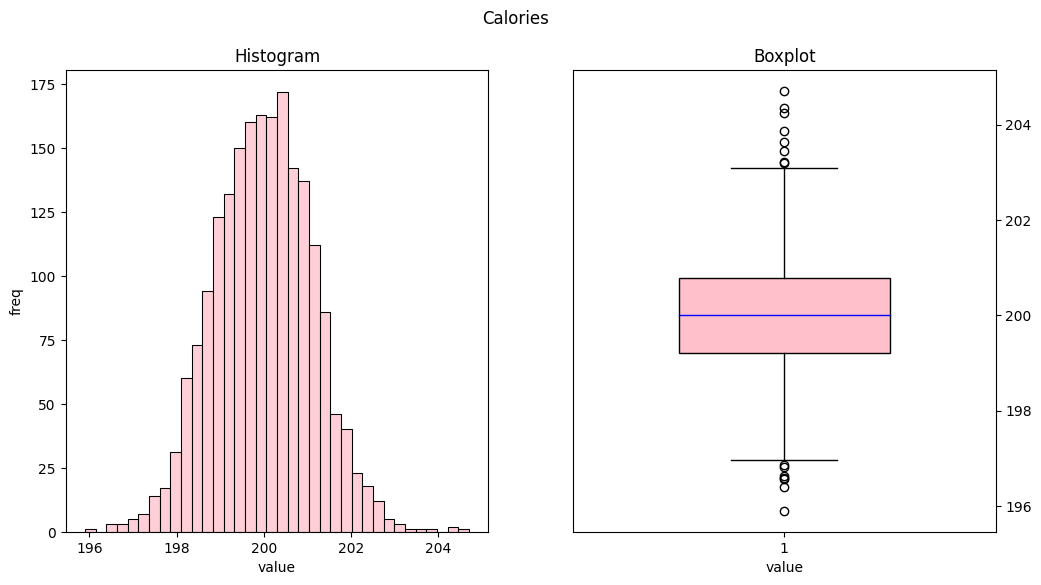

In [156]:
dist_plot(data['Calories'], True)

Terlihat pada histogram bahwa distribusi data **Calories** memiliki puncak yang simetris dan bentuknya mendekati distribusi normal. Hal ini ditandai dengan puncak yang tinggi di sekitar nilai 200 dan kurva yang menyebar secara merata di kedua sisi puncak tersebut. Dari histogram ini, kita dapat menyimpulkan bahwa sebagian besar data berkumpul di sekitar nilai tengah dan menunjukkan variasi yang terbatas dari nilai tengah tersebut, yang merupakan ciri khas **distribusi normal**.

Pada boxplot, garis median (Q2) berada hampir di tengah kotak interkuartil (IQR), yang menunjukkan bahwa separuh data berada di bawah nilai ini dan separuh lainnya di atasnya. Hal ini menunjukkan bahwa data cenderung terdistribusi secara simetris sekitar median. Selain itu, panjang whisker atas lebih panjang daripada whisker bawah yang mengindikasikan bahwa ada lebih banyak variasi atau rentang nilai di atas median dibandingkan di bawahnya. Outlier yang terlihat pada bagian atas boxplot menunjukkan adanya beberapa nilai yang jauh melebihi rentang nilai kebanyakan data, namun tidak cukup untuk mengubah kesimpulan bahwa distribusi tersebut adalah normal.

Nilai data **Calories** berkonsentrasi di sekitar 200, dengan distribusi yang cenderung normal dan beberapa nilai outlier.

### 2. Serving

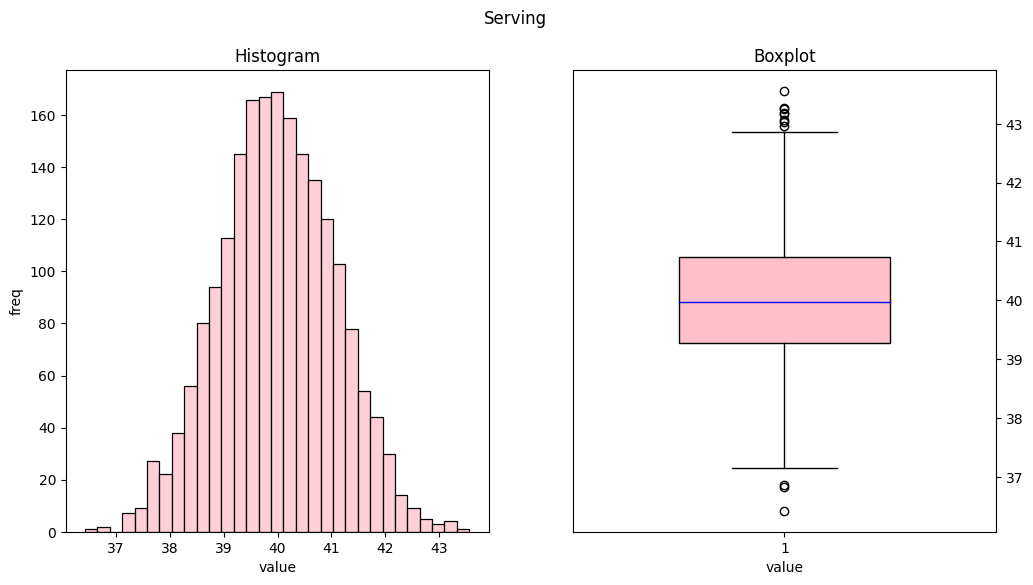

In [157]:
dist_plot(data['Serving'], True)

Dari histogram, terlihat bahwa distribusi data **Serving** memiliki puncak yang simetris dan bentuknya mendekati distribusi normal. Hal ini ditandai dengan puncak yang tinggi di sekitar nilai 40 dan kurva yang menyebar secara merata di kedua sisi puncak tersebut. Distribusi ini, dengan sebagian besar data yang berkumpul di sekitar nilai tengah dan menunjukkan variasi yang terbatas dari nilai tengah, adalah ciri khas **distribusi normal**.

Pada boxplot, garis median (Q2) berada hampir di tengah kotak interkuartil (IQR). Hal ini menunjukkan bahwa separuh data berada di bawah nilai ini dan separuh lainnya di atasnya, mengindikasikan distribusi data yang simetris sekitar median. Whisker atas boxplot lebih panjang dibandingkan whisker bawah, mengindikasikan adanya variasi nilai yang lebih besar di atas median. Selain itu, keberadaan beberapa outlier menunjukkan adanya nilai yang jauh melebihi rentang nilai mayoritas data. Namun, jumlah outlier yang relatif sedikit ini tidak cukup untuk mengubah kesimpulan bahwa distribusi secara keseluruhan adalah normal.

Data **serving** berkisar terutama di sekitar 40 dengan distribusi yang cukup simetris dan normal.

### 3. Protein

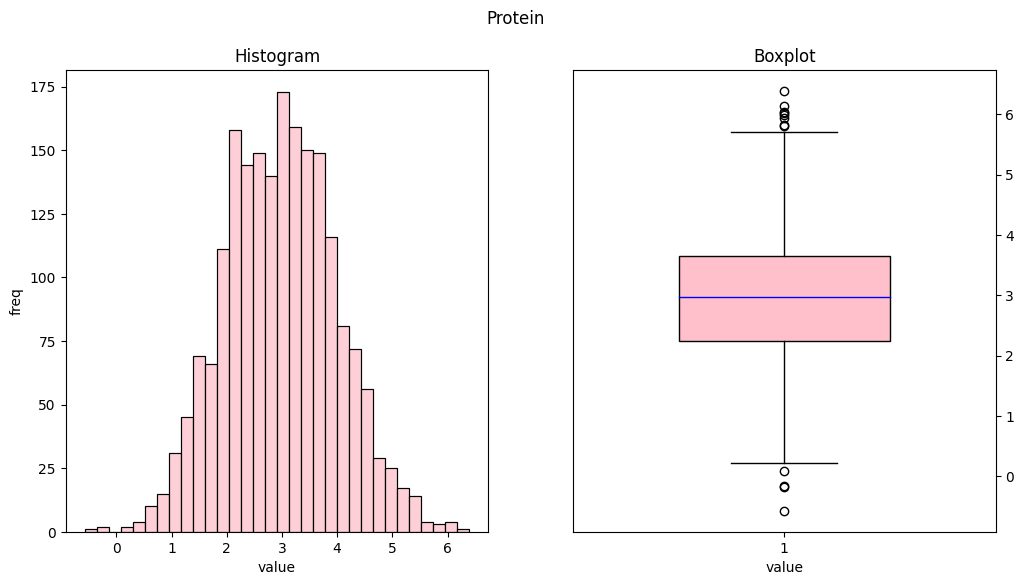

In [158]:
dist_plot(data['Protein'], True)

Dari histogram yang diberikan untuk data **Protein**, kita dapat melihat bahwa distribusi data memiliki puncak yang simetris dan bentuknya mendekati distribusi normal. Puncak histogram ini berada di sekitar nilai 3, dengan kurva yang merata di kedua sisi, mencerminkan sebagian besar data berkumpul di sekitar nilai tengah tersebut. Kurva menunjukkan variasi terbatas dari nilai tengah, yang merupakan karakteristik dari **distribusi normal**.

Pada boxplot, garis median (Q2) berada tepat di tengah kotak interkuartil (IQR). Penempatan median ini menunjukkan bahwa data terdistribusi secara simetris sekitar nilai median. Whisker atas dan bawah boxplot memiliki panjang yang hampir sama, yang menunjukkan distribusi nilai atas dan bawah yang serupa terhadap median. Terdapat beberapa outlier yang terlihat yang menunjukkan adanya beberapa nilai yang tidak tipikal dibandingkan dengan mayoritas data. Namun, jumlah outlier yang terbatas ini tidak cukup untuk mengubah kesimpulan bahwa distribusi secara keseluruhan adalah normal.

Distribusi data **Protein** cenderung bersifat normal dengan keberadaan beberapa outlier yang tidak mengubah karakteristik distribusi utama. Data protein pada umumnya berkisar antara 2 hingga 4, dengan nilai median 3.

### 4. Sugar

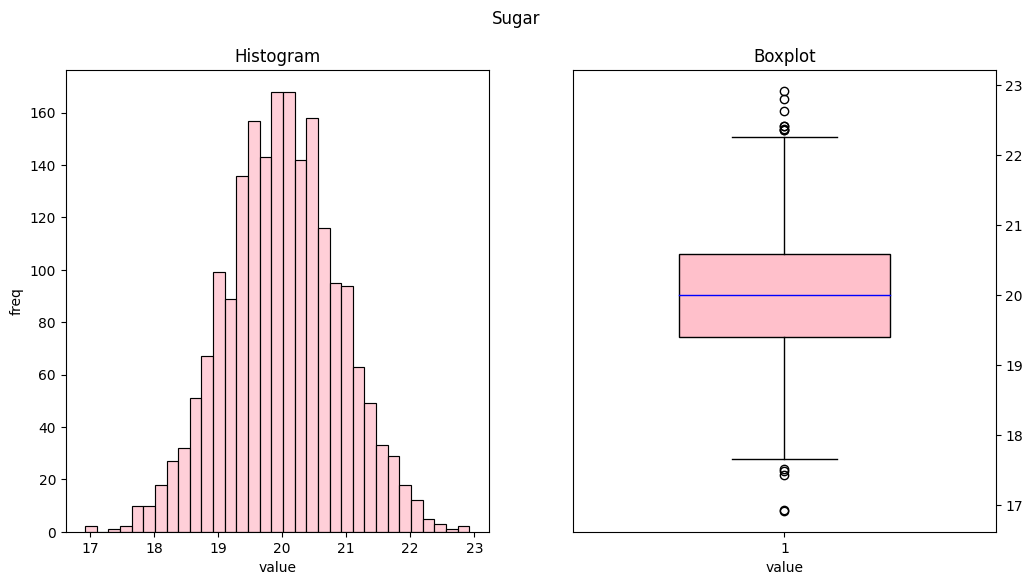

In [159]:
dist_plot(data['Sugar'], True)

Dari histogram yang menunjukkan distribusi data **Sugar**, kita dapat melihat bahwa distribusi memiliki bentuk yang simetris dengan puncak di sekitar nilai 20. Hal ini menandakan sebagian besar data terkonsentrasi di sekitar nilai tengah ini, dengan bentuk distribusi yang mendekati bentuk **distribusi normal** karena kurva yang merata di kedua sisi puncak.

Dalam boxplot, median (Q2) berada tepat di tengah kotak interkuartil (IQR). Hal ini menunjukkan bahwa data terdistribusi secara simetris sekitar nilai median, dengan whisker atas dan bawah yang membentang hampir sama panjang dari kotak, menunjukkan bahwa data atas dan bawah tersebar serupa dari median. Terdapat beberapa outlier yang terlihat yang menandakan adanya beberapa nilai yang tidak tipikal dibandingkan dengan mayoritas data. Namun, outlier ini tidak cukup banyak untuk mengganggu kesimpulan bahwa distribusi umumnya normal.

Distribusi data **Sugar** cenderung normal dengan beberapa outlier yang tidak mengubah karakteristik utama distribusi. Data umumnya berkisar antara 19 hingga 21 dengan median 20.

### 5. Sodium

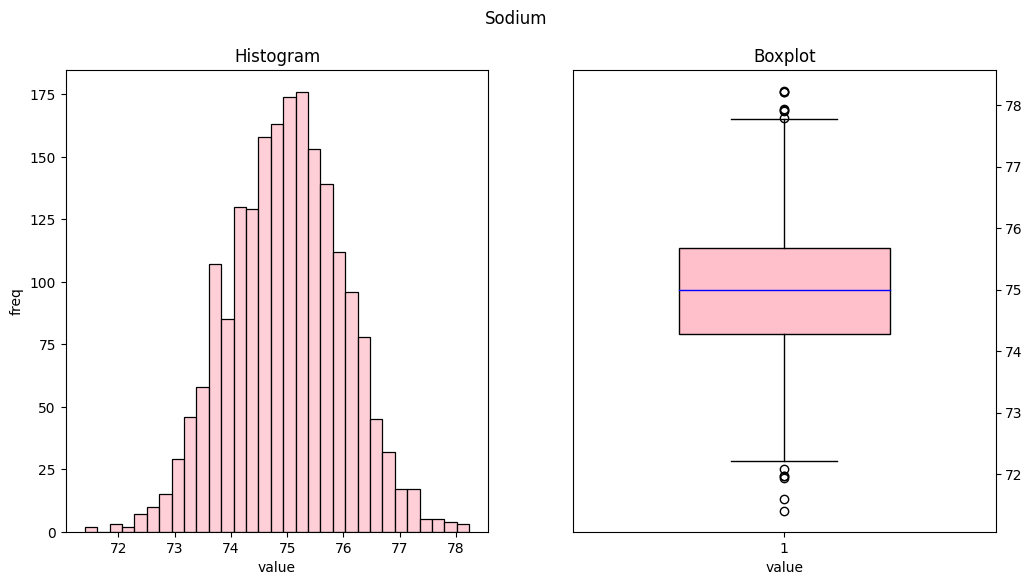

In [160]:
dist_plot(data['Sodium'], True)

Dari histogram yang menampilkan distribusi data **Sodium**, dapat terlihat bahwa histogram memiliki puncak yang cukup simetris dengan titik tertinggi sekitar nilai 76. Ini menunjukkan bahwa kebanyakan data terkonsentrasi di sekitar nilai ini, dengan distribusi yang cukup simetris di kedua sisi puncak, yang menandakan distribusi yang mendekati **normal**.

Pada boxplot, garis median (Q2) berada tepat di tengah kotak interkuartil (IQR). Posisi median ini menegaskan distribusi yang simetris sekitar nilai median tersebut. Whisker atas dan bawah boxplot menunjukkan variasi nilai yang serupa di atas dan di bawah median, dengan whisker yang membentang hampir sama panjang dari kotak, yang menunjukkan distribusi nilai atas dan bawah yang relatif seragam dari median. Terdapat beberapa outlier yang terlihat yang menandakan keberadaan beberapa nilai yang tidak sesuai dibandingkan dengan mayoritas data. Namun, jumlah outlier yang terbatas ini tidak cukup untuk mengganggu kesimpulan bahwa distribusi umumnya normal.

Distribusi data **Sodium** cenderung normal dengan beberapa outlier. Data secara umum berkisar antara 75 hingga 77, dengan median 76.

### 6. Fat

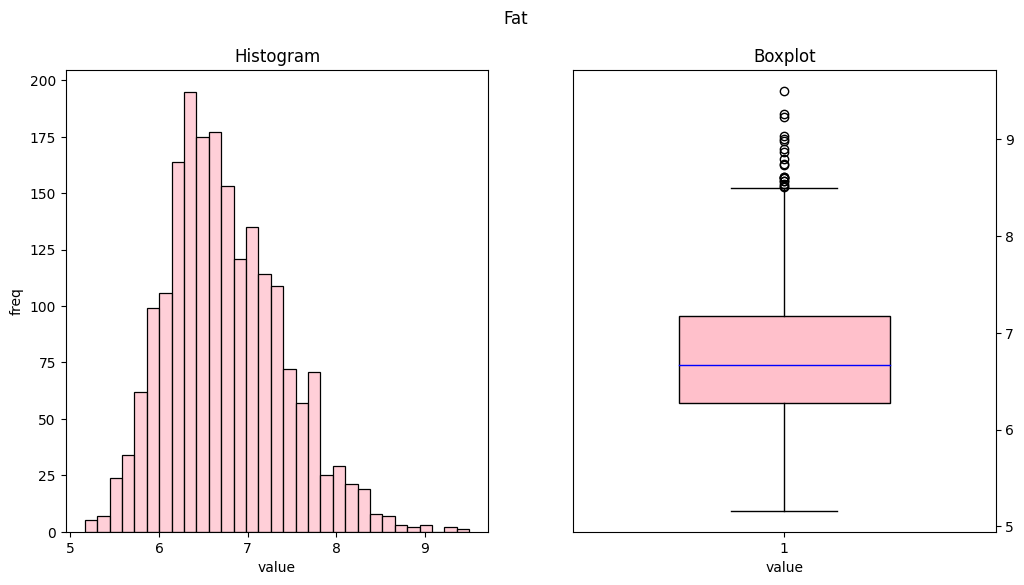

In [161]:
dist_plot(data['Fat'], True)

Dari histogram yang menampilkan data **Fat**, dapat disimpulkan bahwa distribusi data yang tidak sepenuhnya simetris dan terlihat skewed ke kanan (positif). Hal ini ditunjukkan oleh puncak sekitar nilai 7 dengan penurunan frekuensi yang lebih tajam pada nilai yang lebih tinggi daripada nilai yang lebih rendah. Histogram memiliki puncak utama di sekitar 0.5 dan secara bertahap menurun frekuensinya menuju nilai yang lebih tinggi. 

Posisi median menunjukkan distribusi yang tidak sepenuhnya simetris, dengan kotak interkuartil yang lebih pendek pada sisi bawah dan lebih panjang pada sisi atas, mengindikasikan distribusi yang cenderung memiliki ekor lebih panjang ke nilai yang lebih tinggi. Kehadiran beberapa outlier, terutama pada sisi atas, lebih jelas daripada yang biasanya ditemukan dalam distribusi normal. Outlier-outlier ini menunjukkan adanya nilai-nilai ekstrem yang mungkin mempengaruhi bentuk distribusi keseluruhan.

Data **Fat** menunjukkan skewness positif. Hal ini berarti bahwa ada lebih banyak distribusi nilai yang lebih tinggi yang melampaui nilai tengah atau median dari data, dengan frekuensi yang menurun secara bertahap menuju nilai yang lebih tinggi. Ini juga diindikasikan oleh lokasi median yang lebih rendah relatif terhadap keseluruhan rentang nilai dan oleh keberadaan beberapa nilai ekstrem di sisi lebih tinggi dari distribusi.

### 7. Fiber

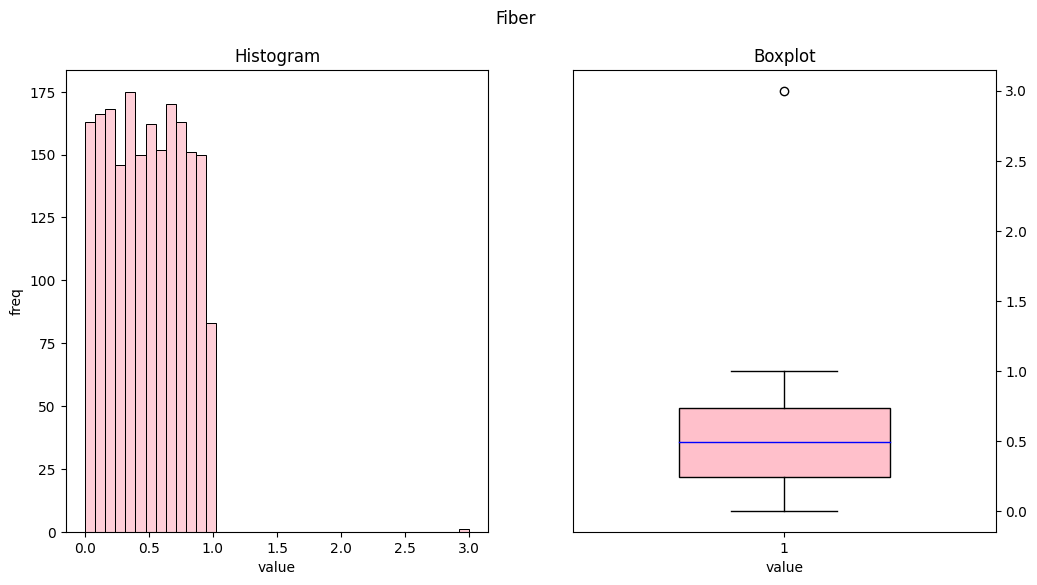

In [162]:
dist_plot(data['Fiber'], True)

Dari histogram yang menampilkan data **Fiber**, dapat disimpulkan bahwa distribusi data yang tidak sepenuhnya simetris dan terlihat skewed ke kanan (positif). Histogram memiliki puncak utama di sekitar 0.5 dan secara bertahap menurun frekuensinya menuju nilai yang lebih tinggi. Tidak ada penumpukan yang signifikan pada nilai lebih rendah atau nol, menandakan bahwa hampir semua entri memiliki nilai serat yang terdeteksi.

Boxplot menunjukkan median yang berada dekat dengan 0.5. Kotak interkuartil (IQR) memiliki whisker yang memperluas jangkauan ke nilai yang lebih rendah dan lebih tinggi, namun tetap dalam jarak yang wajar dari IQR. Terdapat beberapa outlier yang ditandai di atas 2.5, yang menunjukkan keberadaan beberapa entri dengan kadar serat yang jauh lebih tinggi dibandingkan dengan sebagian besar data.

Data **Fiber** menunjukkan distribusi yang cenderung skewed ke kanan, dengan sebagian besar data berkonsentrasi pada nilai rendah tetapi dengan beberapa nilai yang jauh lebih tinggi sebagai outlier. Median dan IQR menunjukkan bahwa meskipun ada variasi, sebagian besar data cukup terkumpul di sekitar nilai rendah. Outlier menunjukkan bahwa sementara sebagian besar sampel memiliki kadar serat yang relatif rendah, ada beberapa sampel dengan kadar serat yang jauh lebih tinggi.

### 8. Flavour

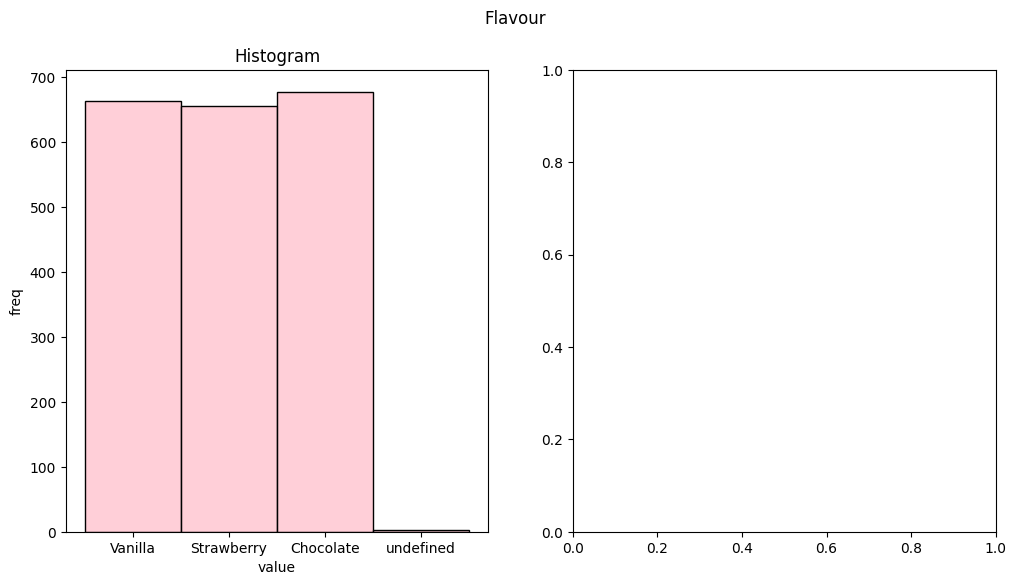

In [163]:
dist_plot(data['Flavour'], False)

Berdasarkan histogram, ketiga kategori memiliki frekuensi yang hampir sama, yang menunjukkan distribusi yang merata. Hal ini bisa menunjukkan bahwa tidak ada bias signifikan terhadap rasa tertentu dalam pengumpulan data atau dalam preferensi yang dilaporkan oleh subjek data. Ketinggian bar yang hampir seragam untuk semua kategori menunjukkan konsistensi dalam jumlah entri per kategori.

### 9. Popularity

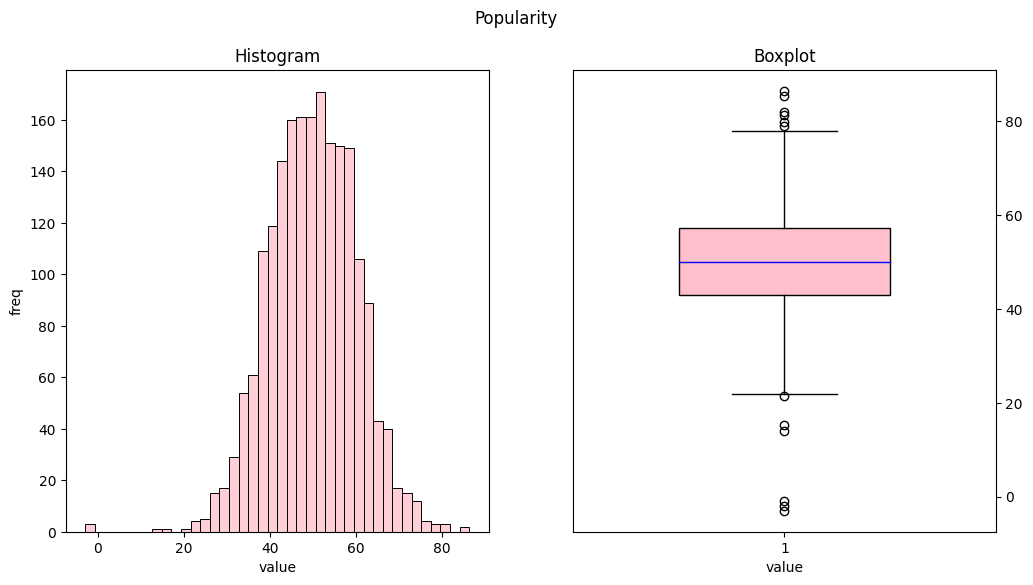

In [164]:
dist_plot(data['Popularity'], True)

Dari analisis histogram dan boxplot, data **Popularity** menunjukkan karakteristik distribusi yang tidak normal. Adanya skewness, variasi yang luas dalam nilai-nilai data, dan outlier menandakan bahwa data memiliki ciri-ciri **distribusi tidak normal**. 

Pada boxplot, adanya beberapa outlier di kedua sisi whiskers menunjukkan variasi yang ekstrem di luar apa yang diharapkan dalam distribusi normal. Outliers ini mungkin menunjukkan skewness atau keberadaan sub-grup dalam data.

# Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak

In [165]:
def check_normal_dist(atr, alpha=0.05):
    stat, p = normaltest(atr)
    display(Markdown(f'Nilai p = ***{p}***'))
    if p > alpha:
        display(Markdown(f'Data ***{atr.name}*** Terdistribusi Normal'))
    else:
        display(Markdown(f'Data ***{atr.name}*** Tidak Terdistribusi Normal'))
    
    sns.histplot(atr, kde=True, color='#d97c93')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

### Calories

Nilai p = ***0.1700302884200949***

Data ***Calories*** Terdistribusi Normal

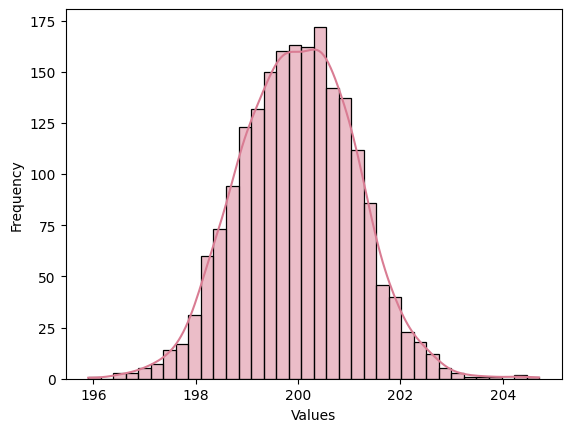

In [166]:
check_normal_dist(data['Calories'])

### Serving

Nilai p = ***0.4581951703155709***

Data ***Serving*** Terdistribusi Normal

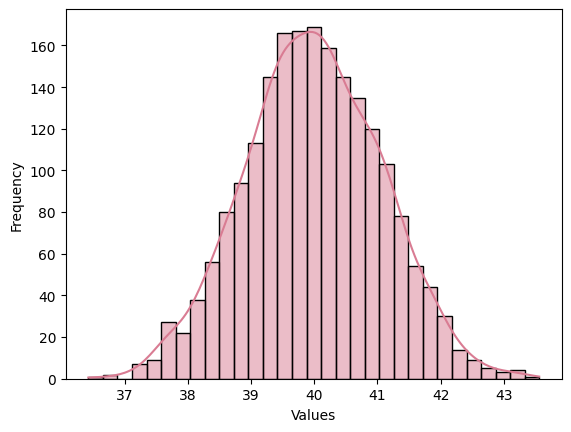

In [167]:
check_normal_dist(data['Serving'])

### Protein

Nilai p = ***0.1744459424049169***

Data ***Protein*** Terdistribusi Normal

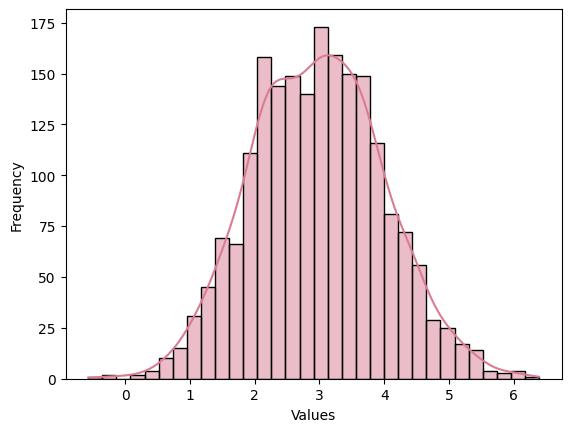

In [168]:
check_normal_dist(data['Protein'])

### Sugar

Nilai p = ***0.9176636617997853***

Data ***Sugar*** Terdistribusi Normal

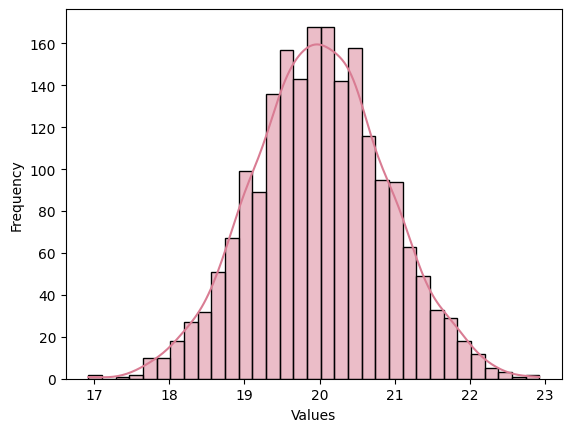

In [169]:
check_normal_dist(data['Sugar'])

### Sodium

Nilai p = ***0.8396285669103378***

Data ***Sodium*** Terdistribusi Normal

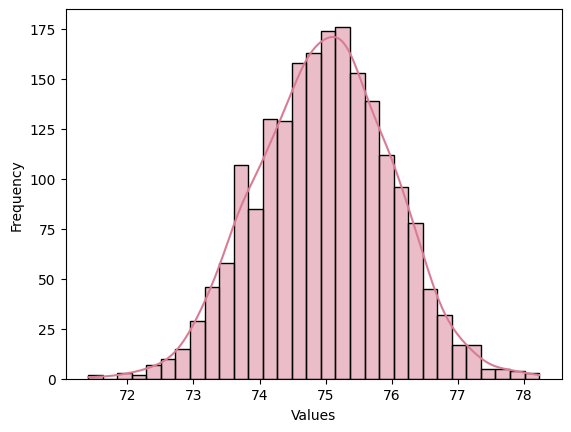

In [170]:
check_normal_dist(data['Sodium'])

### Fat

Nilai p = ***3.771500677034063e-20***

Data ***Fat*** Tidak Terdistribusi Normal

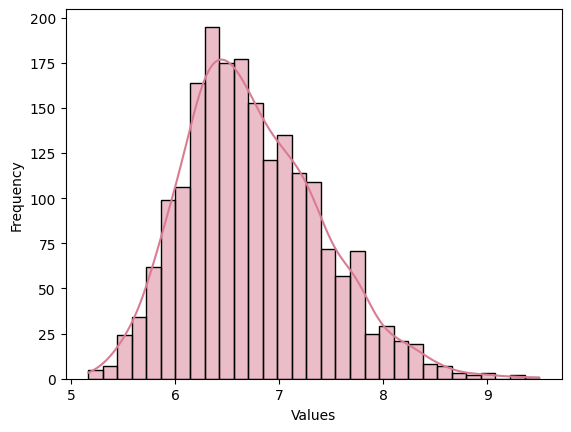

In [171]:
check_normal_dist(data['Fat'])

### Fiber

Nilai p = ***1.5689709054857066e-21***

Data ***Fiber*** Tidak Terdistribusi Normal

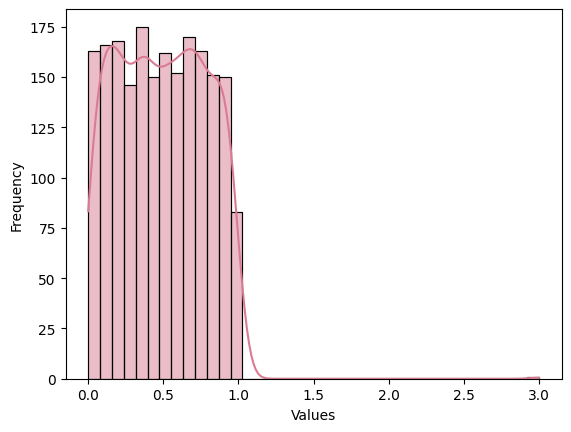

In [172]:
check_normal_dist(data['Fiber'])

### Popularity

Nilai p = ***9.932206944066158e-09***

Data ***Popularity*** Tidak Terdistribusi Normal

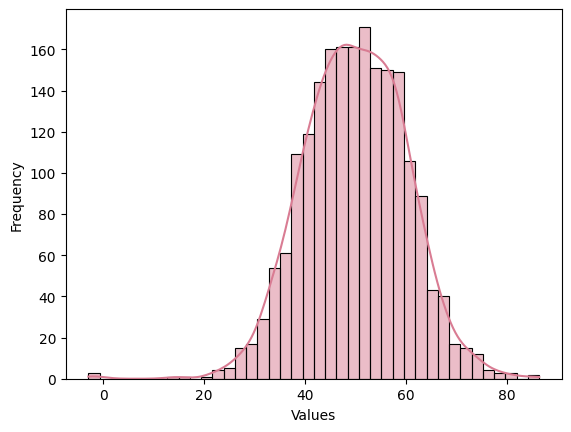

In [173]:
check_normal_dist(data['Popularity'])